In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import skimage as sk
import skimage.io as io
import matplotlib
from skimage.util import img_as_ubyte

In [61]:
from align_images_code import get_points, align_images
import triangulation as tri

In [4]:
from pathlib import Path
data = Path("input")
data.mkdir(parents=True, exist_ok=True)

In [5]:
def read_img(img_name):
    im_path = data / img_name
    img = io.imread(im_path)
    img = img_as_ubyte(img)
    return img
im1 = read_img('passport0.jpg')
im2 = read_img('passport1.jpg')

In [6]:
im1.shape, im1.dtype

((400, 400, 3), dtype('uint8'))

In [7]:
im2.shape, im2.dtype

((2572, 2000, 3), dtype('uint8'))

In [8]:
# matplotlib.use("TkAgg")
# # matplotlib.interactive(True)
# im1_pts, im2_pts = get_points(im1, im2, 2)

In [9]:
# im1_pts

In [10]:
# im2_pts

In [36]:
im1_pts = [(168.3595147041188, 172.57553932868734),
 (244.04541820459184, 172.57553932868734)]
im2_pts = [(780.2360288137563, 1114.7206343673752),
 (1228.4758336237944, 1102.7675729057742)]
im1_aligned, im2_aligned = align_images(im1, im2, im1_pts, im2_pts)

113: uint8 uint8
asserted channels


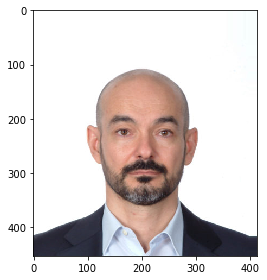

In [43]:
io.imshow(im1_aligned)

In [44]:
# get correspondences
matplotlib.use("TkAgg")
im1_pts, im2_pts = get_points(im1, im2, 10)

Please select 10 points in each image for alignment.


In [45]:
im1_pts

[(166.66172263803438, 171.82650182217168),
 (243.46724009561498, 174.17769113209766),
 (206.63194090677527, 205.52688193111015),
 (172.93156079783685, 247.0645597398017),
 (234.0624828559112, 245.49710019985108),
 (103.17961127003409, 158.50309573259142),
 (297.54459422391153, 162.42174458246797),
 (121.20539597946626, 229.03877503036952),
 (285.78864767428183, 229.82250480034483),
 (205.84821113679996, 305.84429248795016)]

In [46]:
im2_pts

[(782.274751913515, 1102.990994615337),
 (1222.6947968888612, 1097.6847290132243),
 (989.2191103959067, 1368.304274720967),
 (819.4186111283034, 1596.473695611809),
 (1185.5509376740729, 1564.6361019991334),
 (426.75495657197075, 1034.009541787873),
 (1535.7644674135045, 1002.1719481751975),
 (543.492799818448, 1389.5293371294174),
 (1445.5579521775903, 1362.9980091188545),
 (1010.4441728043571, 1867.093241319552)]

In [49]:
from scipy.spatial import Delaunay
from scipy.interpolate import interp2d

In [70]:
avg_pts = tri.avg_points(im1_pts, im2_pts, 0.8)

In [71]:
delalnay_tri = Delaunay(avg_pts)

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.b

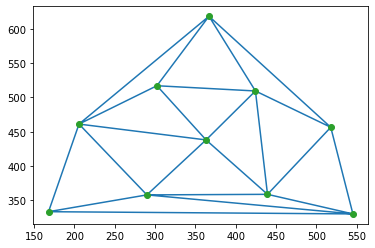

In [75]:
import matplotlib.pyplot as plt
plt.triplot(avg_pts[:,0], avg_pts[:,1], delalnay_tri.simplices)
plt.plot(avg_pts[:,0], avg_pts[:,1], 'o')
plt.show()

In [76]:
delalnay_tri.simplices

array([[6, 0, 5],
       [0, 7, 5],
       [7, 0, 2],
       [7, 3, 9],
       [3, 7, 2],
       [8, 1, 6],
       [1, 0, 6],
       [0, 1, 2],
       [4, 8, 9],
       [3, 4, 9],
       [4, 3, 2],
       [1, 4, 2],
       [4, 1, 8]], dtype=int32)